In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv(r"C:\Users\Prasad\Desktop\ml\data_ml\loan_sanction\loan_sanction_train.csv")
test = pd.read_csv(r"C:\Users\Prasad\Desktop\ml\data_ml\loan_sanction\loan_sanction_test.csv")

In [3]:
train.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [4]:
train_original = train.copy()
test_original = test.copy()

In [5]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [7]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
train.shape, test.shape

((614, 13), (367, 12))

In [9]:
train['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [10]:
train['Loan_Status'].value_counts(normalize=True)

Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64

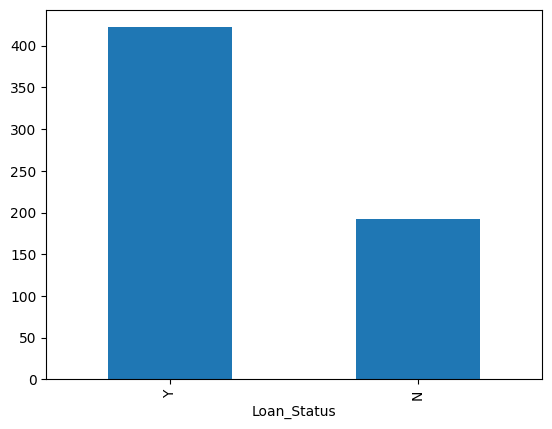

In [11]:
train['Loan_Status'].value_counts().plot.bar()
plt.show()

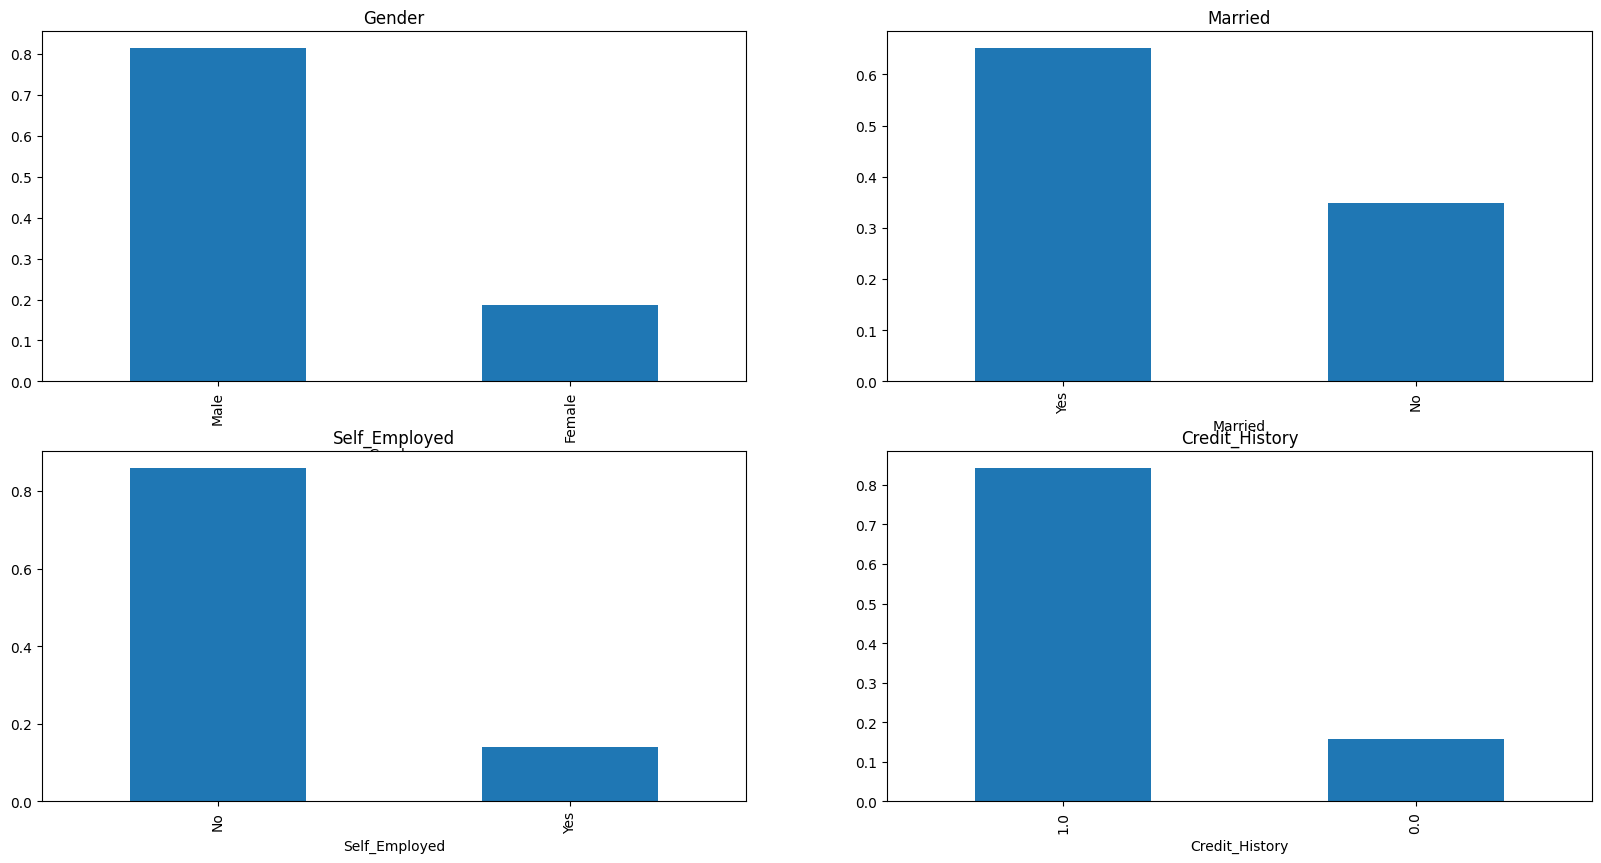

In [12]:
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')

plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title='Married')

plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')

plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')

plt.show()

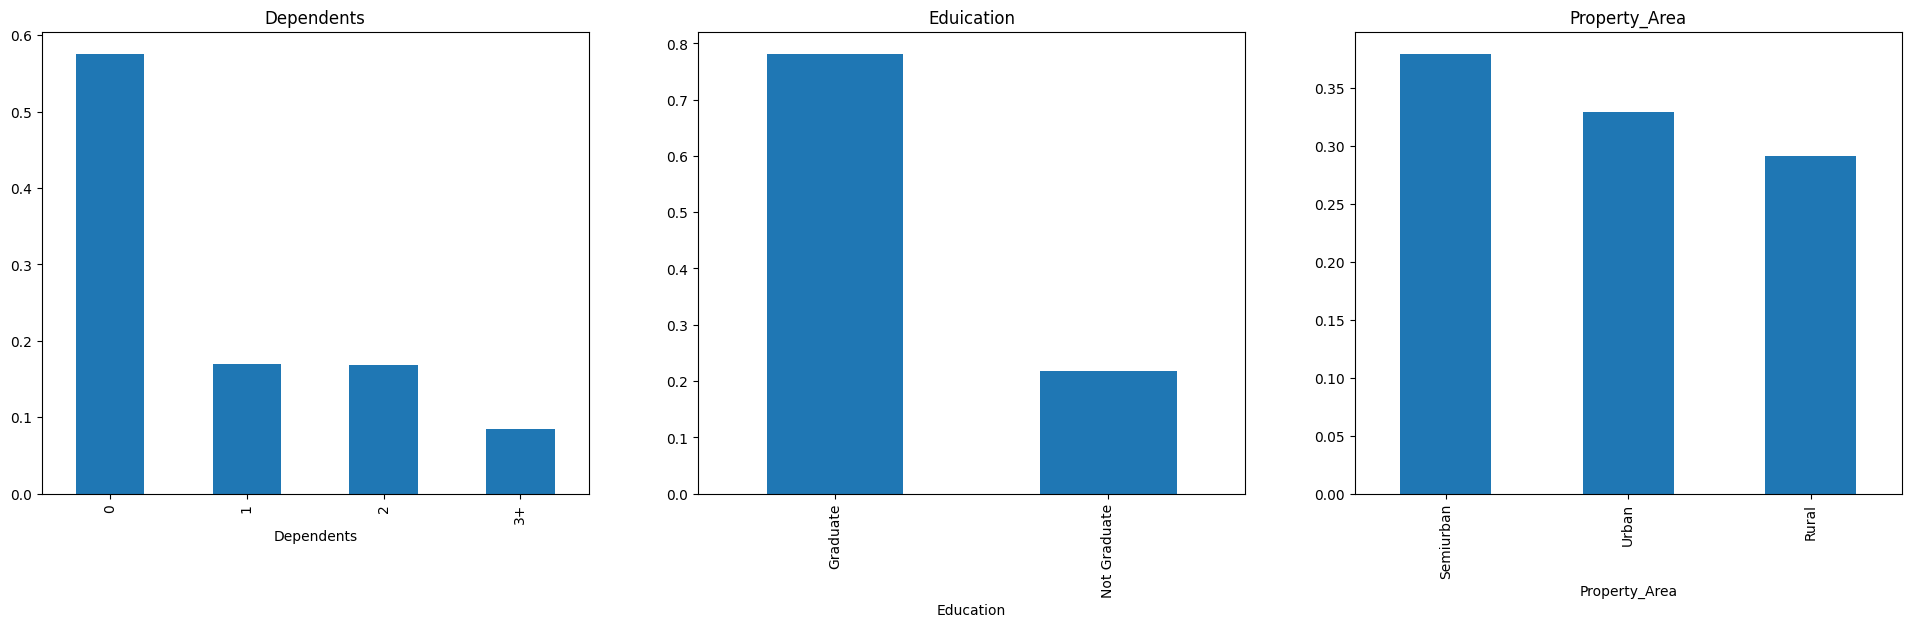

In [13]:
plt.figure(1)

plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Dependents')

plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title='Eduication')

plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')

plt.show()

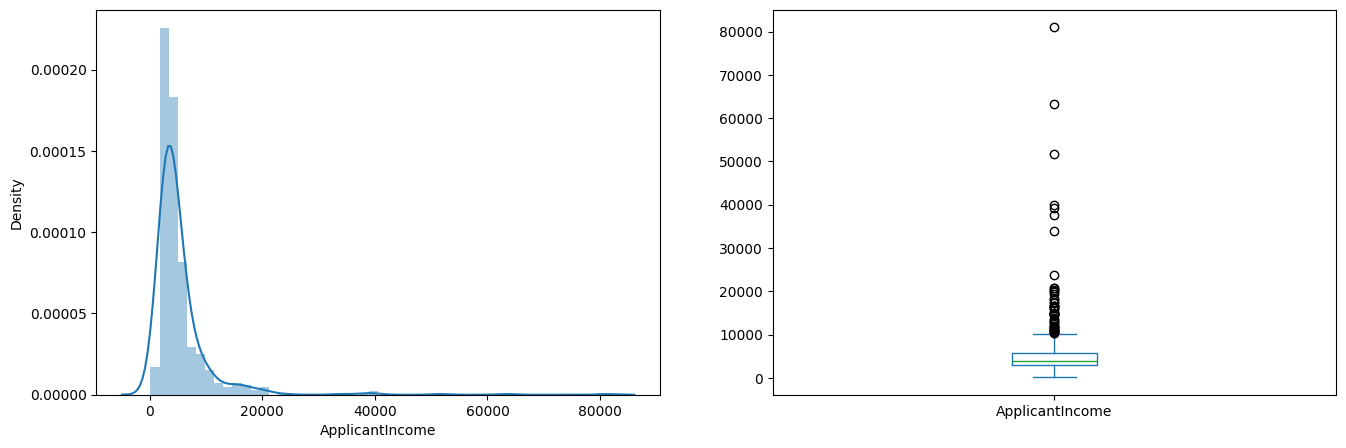

In [14]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome']);
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

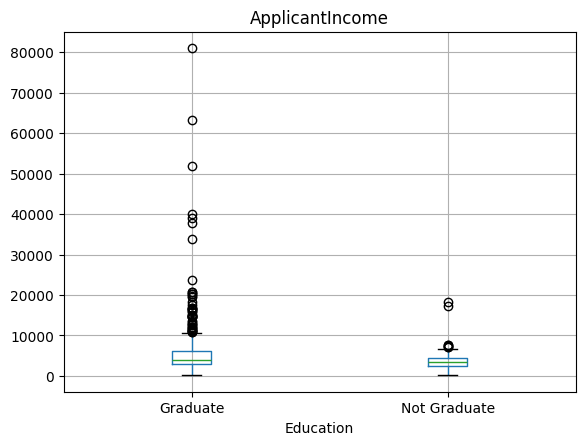

In [15]:
train.boxplot(column='ApplicantIncome', by='Education')
plt.suptitle("")
plt.show()

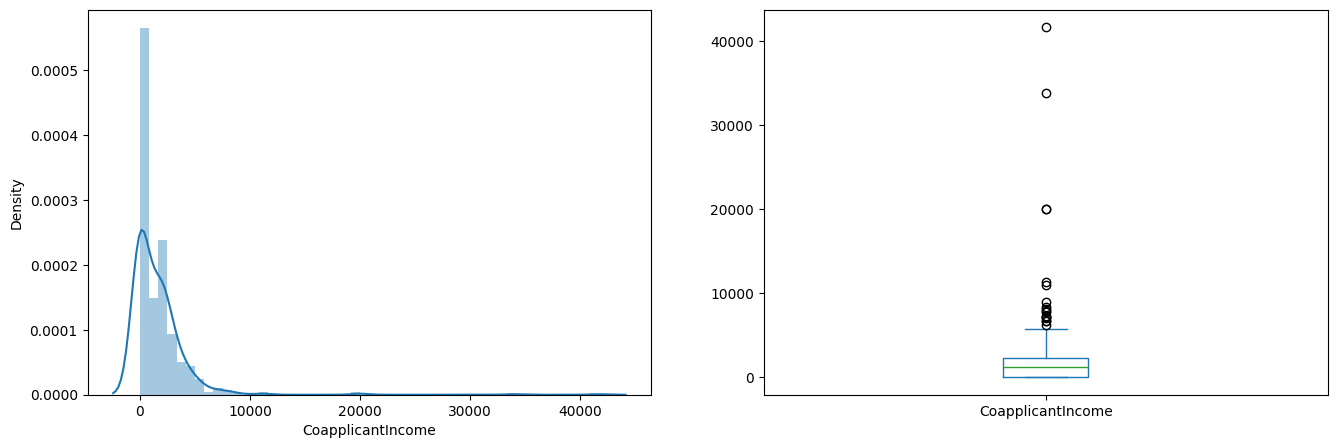

In [16]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome']);
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

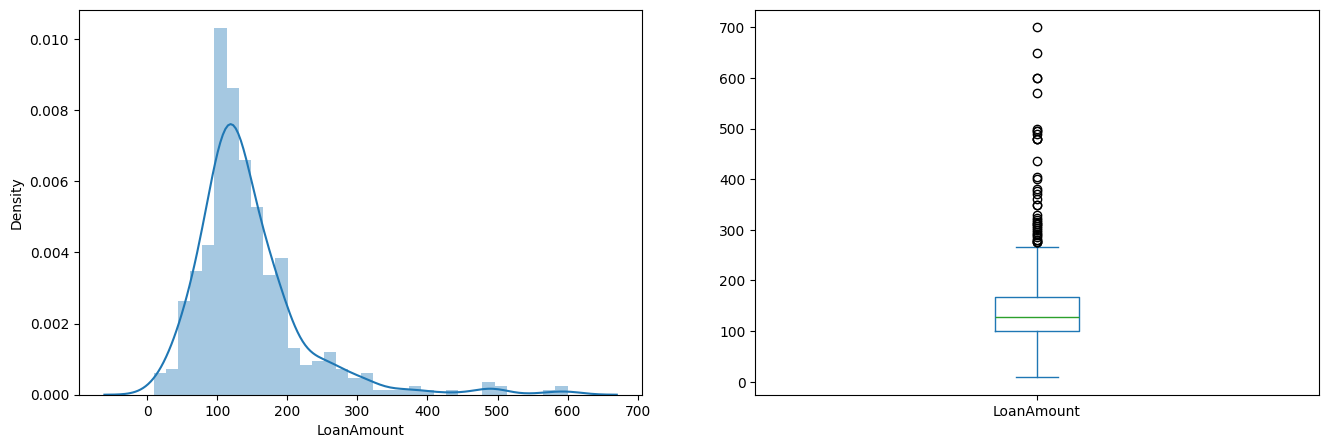

In [17]:
plt.figure(1)
plt.subplot(121)
df=train.dropna()
sns.distplot(df['LoanAmount']);
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

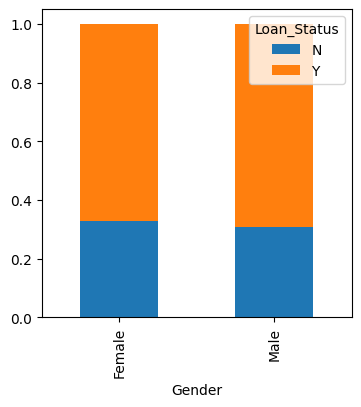

In [18]:
Gender = pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True, figsize=(4,4))
plt.show()

In [19]:
Married = pd.crosstab(train['Married'], train['Loan_Status'])
Dependents = pd.crosstab(train['Dependents'], train['Loan_Status'])
Education = pd.crosstab(train['Education'], train['Loan_Status'])

Self_Employed = pd.crosstab(train['Self_Employed'], train['Loan_Status'])

plt.show()

In [20]:
Married.div(Married.sum(1).astype(float), axis=0)

Loan_Status         N         Y
Married                        
No           0.370892  0.629108
Yes          0.283920  0.716080

In [21]:
Married

Loan_Status    N    Y
Married              
No            79  134
Yes          113  285

In [22]:
Dependents

Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33

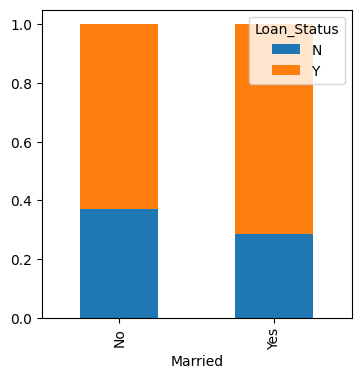

In [23]:
Married.div(Married.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True, figsize=(4,4))
plt.show()

# the proportion for married people's loan approval is high

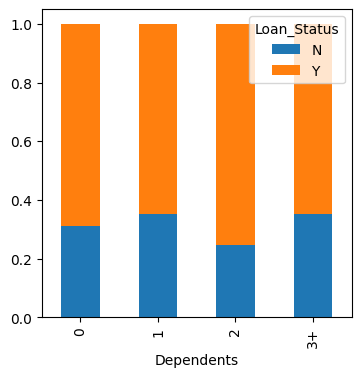

In [25]:
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()

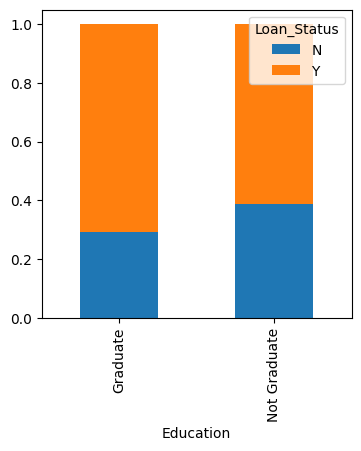

In [26]:
Education.div(Education.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()

# it seems approval of loan proportion for graduate is more than non-graduate

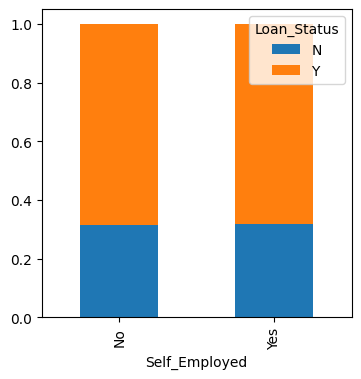

In [28]:
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()

# the proportion of loan approval is similar even if someone is selfemployed or not

In [30]:
Credit_History = pd.crosstab(train['Credit_History'], train['Loan_Status'])


In [31]:
Credit_History

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378

In [32]:
Credit_History.div(Credit_History.sum(1).astype(float), axis=0)

Loan_Status            N         Y
Credit_History                    
0.0             0.921348  0.078652
1.0             0.204211  0.795789

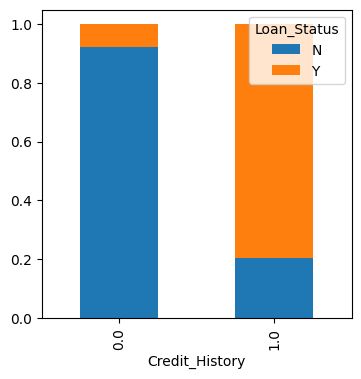

In [33]:
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()

# people with credit history (1) are more likely to get their loans approved 

In [35]:
Property_Area = pd.crosstab(train['Property_Area'],train['Loan_Status'])

In [36]:
Property_Area

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133

In [37]:
Property_Area.sum(1)

Property_Area
Rural        179
Semiurban    233
Urban        202
dtype: int64

In [38]:
Property_Area.div(1, axis=0)

Loan_Status       N      Y
Property_Area             
Rural          69.0  110.0
Semiurban      54.0  179.0
Urban          69.0  133.0

In [39]:
Property_Area.div(Property_Area.sum(1), axis=0)

Loan_Status           N         Y
Property_Area                    
Rural          0.385475  0.614525
Semiurban      0.231760  0.768240
Urban          0.341584  0.658416

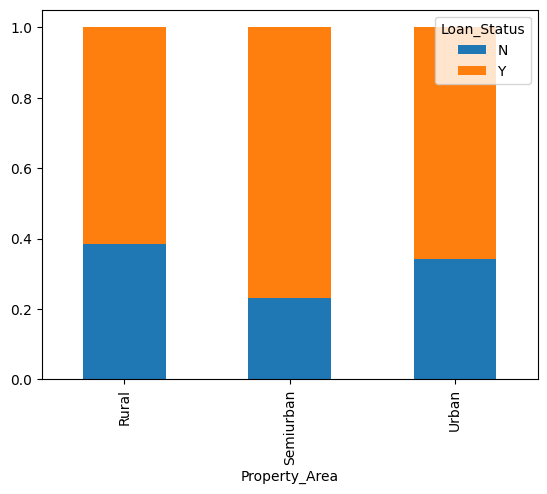

In [40]:
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.show()

# proportions of loan approval in semiurban areas is high compared to rural and urban

In [42]:
train.groupby('Loan_Status')['ApplicantIncome'].mean()

Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64

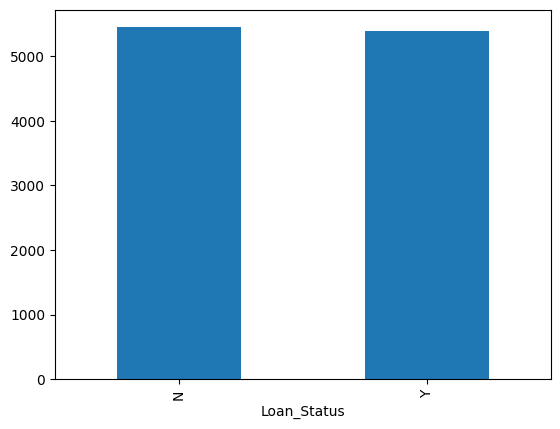

In [43]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()
plt.show()

# Mean Income of People who are getting loan approved is in similar proportions to people whose loan are not getting approved

so we will see the changes in chunks of income ranges

In [46]:
bins = [0, 2500,4000,6000,81000]
group = ['Low', 'Average', 'High', 'Very high']


In [47]:
train['Income_bin'] = pd.cut(df['ApplicantIncome'], bins=bins, labels=group)

In [48]:
train.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status Income_bin  
0             1.0         Urban           Y        NaN  
1             1.0         Rural           N       High  
2             1.0         Urban           Y    Average  
3             1.0         Urban           Y    Average  
4             1.0         Urban           Y       High

# income bin column added in train dataframe

In [50]:
Income_bin = pd.crosstab(train['Income_bin'],train['Loan_Status'])

In [51]:
Income_bin

Loan_Status   N    Y
Income_bin          
Low          26   57
Average      51  123
High         32   79
Very high    39   73

In [52]:
Income_bin.div(Income_bin.sum(1),axis=0)

Loan_Status         N         Y
Income_bin                     
Low          0.313253  0.686747
Average      0.293103  0.706897
High         0.288288  0.711712
Very high    0.348214  0.651786

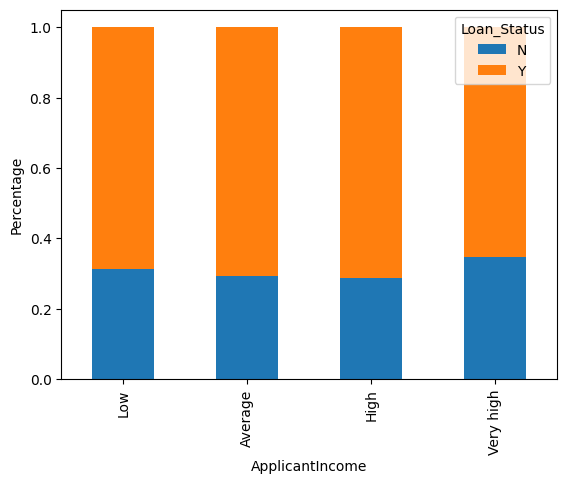

In [53]:
Income_bin.div(Income_bin.sum(1),axis=0).plot(kind='bar', stacked=True)
plt.xlabel('ApplicantIncome')
plt.ylabel('Percentage')
plt.show()

# it seems applicant income does not affect the chances of loan approval 

In [55]:
df.groupby('Loan_Status')['CoapplicantIncome'].mean()

Loan_Status
N    1773.081081
Y    1495.508795
Name: CoapplicantIncome, dtype: float64

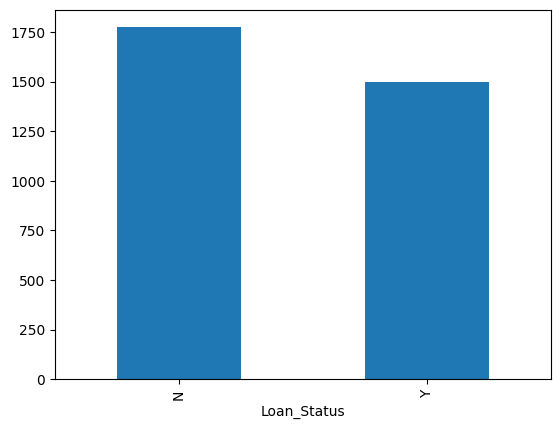

In [56]:
df.groupby('Loan_Status')['CoapplicantIncome'].mean().plot.bar()
plt.show()

# it does not make any sense to mean the all coapplicant income of No and Yes  as the mean of No will be high becase many people will not get loan

# trying to compare for coapplicant income using the bin method

In [59]:
bins=[0,1000,3000,42000]
group=['Low','Average','High']

In [60]:
train['Coapplicant_Income_bin'] = pd.cut(df['CoapplicantIncome'], bins=bins, labels=group)

In [61]:
train.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status Income_bin Coapplicant_Income_bin  
0             1.0         Urban           Y        NaN                    NaN  
1             1.0         Rural           N       High                Average  
2             1.0         Urban           Y    Average                    NaN  
3             1.0         Urban           Y    Average                Average  
4             1.0         Urban           Y       High                    NaN

# coapplicant income range based on low avg and high

In [63]:
Coapplicant_Income_bin = pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])

In [64]:
Coapplicant_Income_bin

Loan_Status              N    Y
Coapplicant_Income_bin         
Low                      3   15
Average                 46  123
High                    24   53

In [65]:
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1), axis=0)

Loan_Status                    N         Y
Coapplicant_Income_bin                    
Low                     0.166667  0.833333
Average                 0.272189  0.727811
High                    0.311688  0.688312

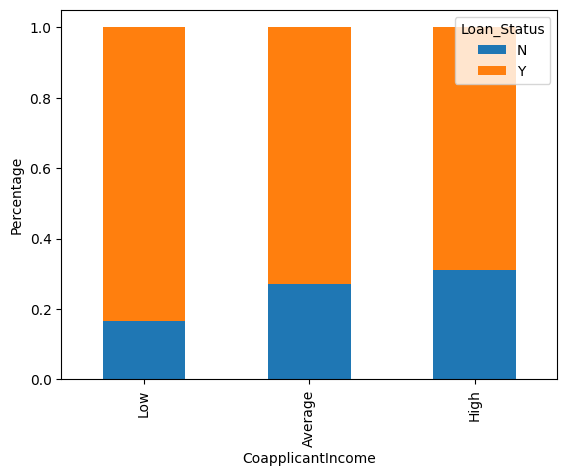

In [66]:
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel("CoapplicantIncome")
plt.ylabel('Percentage')
plt.show()

It shows that if coapplicant’s income is less the chances of loan approval are high. But this does not look right. The possible reason behind this may be that most of the applicants don’t have any coapplicant so the coapplicant income for such applicants is 0 and hence the loan approval is not dependent on it. So we can make a new variable in which we will combine the applicant’s and coapplicant’s income to visualize the combined effect of income on loan approval.

# combining applicant and coapplicant income

In [69]:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']

In [70]:
train.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status Income_bin Coapplicant_Income_bin  \
0             1.0         Urban           Y        NaN                    NaN   
1             1.0         Rural           N       High                Average   
2             1.0         Urban           Y    Average                    NaN   
3             1.0         Urban           Y    Average                Average   
4             1.0         Urban           Y       High                    NaN   

   Total_Income  
0        5849.0  
1        6091.0  
2        3000.0  
3        4941.0  
4        6000.0

In [71]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']

In [72]:
train['Total_Income_bin']= pd.cut(train['Total_Income'], bins=bins, labels=group)

In [73]:
train.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status Income_bin Coapplicant_Income_bin  \
0             1.0         Urban           Y        NaN                    NaN   
1             1.0         Rural           N       High                Average   
2             1.0         Urban           Y    Average                    NaN   
3             1.0         Urban           Y    Average                Average   
4             1.0         Urban           Y       High                    NaN   

   Total_Income Total_Income_bin  
0        5849.0             High  
1        6091.0        Very high  
2        3000.0          Average  
3        4941.0             High  
4        6000.0             High

In [74]:
Total_Income_bin = pd.crosstab(train['Total_Income_bin'], train['Loan_Status'])

In [75]:
Total_Income_bin

Loan_Status        N    Y
Total_Income_bin         
Low               14   10
Average           32   87
High              65  159
Very high         81  166

In [76]:
Total_Income_bin.sum(1)

Total_Income_bin
Low           24
Average      119
High         224
Very high    247
dtype: int64

In [77]:
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0)

Loan_Status              N         Y
Total_Income_bin                    
Low               0.583333  0.416667
Average           0.268908  0.731092
High              0.290179  0.709821
Very high         0.327935  0.672065

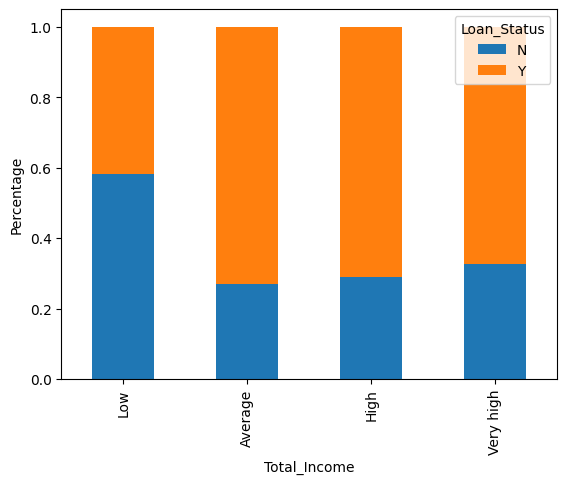

In [78]:
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Total_Income')
plt.ylabel('Percentage')
plt.show()

# Proportion of loans getting approved for applicants having low Total_Income is very less as compared to that of applicants with Average, High and Very High Income.



# Loan Amount variable

In [81]:
bins = [0,100,200, 700]
group = ['Low', 'Average','High']

In [82]:
train['LoanAmount_bin'] =pd.cut(train['LoanAmount'], bins=bins, labels=group)

In [83]:
train.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status Income_bin Coapplicant_Income_bin  \
0             1.0         Urban           Y        NaN                    NaN   
1             1.0         Rural           N       High                Average   
2             1.0         Urban           Y    Average                    NaN   
3             1.0         Urban           Y    Average                Average   
4             1.0         Urban           Y       High                    NaN   

   Total_Income Total_Income_bin LoanAmount_bin  
0        5849.0             High            NaN  
1        6091.0        Very high        Average  
2        3000.0          Average            Low  
3        4941.0             High        Average  
4        6000.0             High        Average

In [84]:
LoanAmount_bin =pd.crosstab(train['LoanAmount'],train['Loan_Status'])

In [85]:
LoanAmount_bin


Loan_Status  N  Y
LoanAmount       
9.0          1  0
17.0         0  1
25.0         0  2
26.0         0  1
30.0         0  2
...         .. ..
500.0        1  0
570.0        1  0
600.0        0  2
650.0        0  1
700.0        0  1

[203 rows x 2 columns]

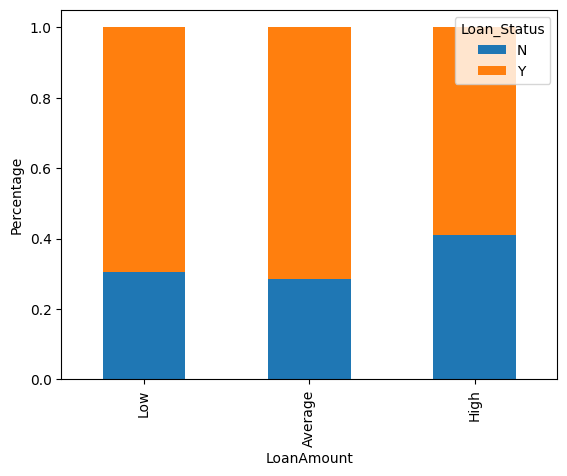

In [86]:
bins=[0,100,200,700] 
group=['Low','Average','High'] 
train['LoanAmount_bin']=pd.cut(df['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status']) 
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('LoanAmount') 
P = plt.ylabel('Percentage')
plt.show()

# loan approval for low and avg Loan Amount  range is high compared to High Loanamount

# so chances of loan approval is high for less loan amount

#  N-> 0 Y->1

In [90]:
train = train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin','Total_Income'], axis=1)


In [91]:
train['Dependents']

0       0
1       1
2       0
3       0
4       0
       ..
609     0
610    3+
611     1
612     2
613     0
Name: Dependents, Length: 614, dtype: object

In [92]:
train.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [93]:
train['Dependents'].replace('3+', 3, inplace=True)


In [94]:
test.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001015   Male     Yes          0      Graduate            No   
1  LP001022   Male     Yes          1      Graduate            No   
2  LP001031   Male     Yes          2      Graduate            No   
3  LP001035   Male     Yes          2      Graduate            No   
4  LP001051   Male      No          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5720                  0       110.0             360.0   
1             3076               1500       126.0             360.0   
2             5000               1800       208.0             360.0   
3             2340               2546       100.0             360.0   
4             3276                  0        78.0             360.0   

   Credit_History Property_Area  
0             1.0         Urban  
1             1.0         Urban  
2             1.0         Urban  
3             NaN         Urban  
4             1.0         Urban

In [95]:
test['Dependents']

0       0
1       1
2       2
3       2
4       0
       ..
362    3+
363     0
364     0
365     0
366     0
Name: Dependents, Length: 367, dtype: object

In [96]:
test['Dependents'].replace('3+', 3, inplace=True)

In [97]:
train['Loan_Status'].replace('N', 0, inplace=True)
train['Loan_Status'].replace('Y', 1, inplace=True)

In [98]:
train['Loan_Status']

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [99]:
train.corr()

ValueError: could not convert string to float: 'LP001002'

In [100]:
train.select_dtypes(include=['number']).corr()

ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome           1.000000          -0.116605    0.570909   
CoapplicantIncome        -0.116605           1.000000    0.188619   
LoanAmount                0.570909           0.188619    1.000000   
Loan_Amount_Term         -0.045306          -0.059878    0.039447   
Credit_History           -0.014715          -0.002056   -0.008433   
Loan_Status              -0.004710          -0.059187   -0.037318   

                   Loan_Amount_Term  Credit_History  Loan_Status  
ApplicantIncome           -0.045306       -0.014715    -0.004710  
CoapplicantIncome         -0.059878       -0.002056    -0.059187  
LoanAmount                 0.039447       -0.008433    -0.037318  
Loan_Amount_Term           1.000000        0.001470    -0.021268  
Credit_History             0.001470        1.000000     0.561678  
Loan_Status               -0.021268        0.561678     1.000000

In [102]:
df1=train.select_dtypes(include=['number'])

In [104]:
matrix= df1.corr()
matrix

ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome           1.000000          -0.116605    0.570909   
CoapplicantIncome        -0.116605           1.000000    0.188619   
LoanAmount                0.570909           0.188619    1.000000   
Loan_Amount_Term         -0.045306          -0.059878    0.039447   
Credit_History           -0.014715          -0.002056   -0.008433   
Loan_Status              -0.004710          -0.059187   -0.037318   

                   Loan_Amount_Term  Credit_History  Loan_Status  
ApplicantIncome           -0.045306       -0.014715    -0.004710  
CoapplicantIncome         -0.059878       -0.002056    -0.059187  
LoanAmount                 0.039447       -0.008433    -0.037318  
Loan_Amount_Term           1.000000        0.001470    -0.021268  
Credit_History             0.001470        1.000000     0.561678  
Loan_Status               -0.021268        0.561678     1.000000

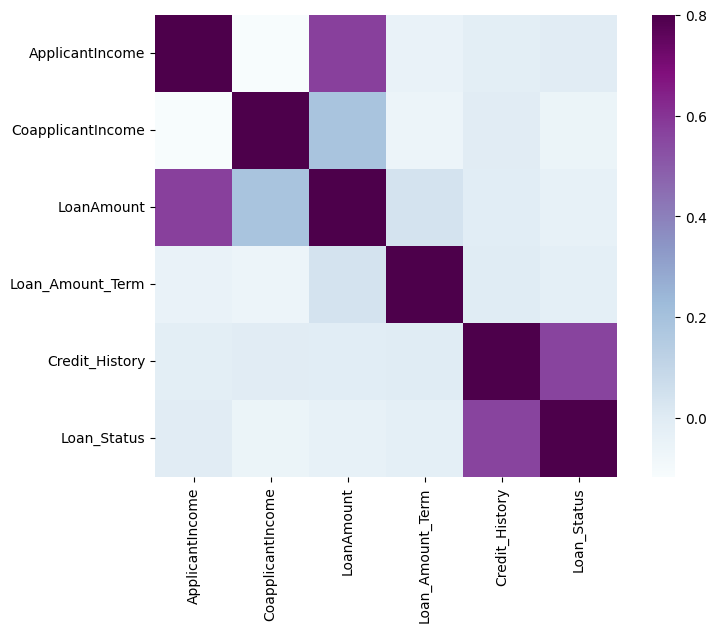

In [106]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=0.8, square=True, cmap='BuPu')
plt.show()

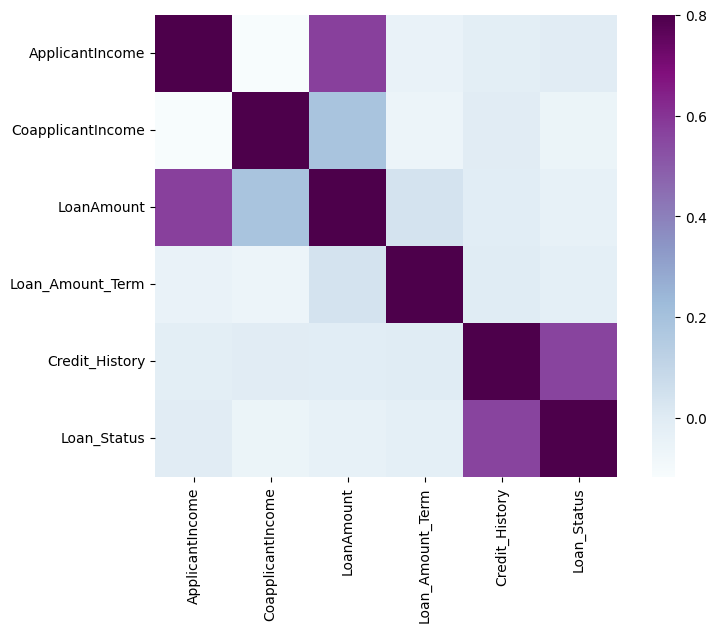

In [108]:
f

In [110]:
ax

<Axes: >

In [112]:
f.savefig('Loan_Prediction_heatmap.png')

# most correlated
ApplicantIncome-LoanAmount

Credit_History - Loan_Status

# little less than above but significant
LoanAmount - CoapplicantIncome

In [116]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Missing Values in Gender Married Dependents Self_Employed LoanAmount Loan_Amount_Term Credit_History

In [119]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

Gender -> 13, Married -> 3 Dependents -> 15 Self_Employed -> 32 LoanAmount -> 22 Loan_Amount_Term -> 14 Credit_History -> 50

In [123]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)

In [125]:
train['Gender'].mode()

0    Male
Name: Gender, dtype: object

In [127]:
print(type(train['Gender'].mode()))

<class 'pandas.core.series.Series'>


In [129]:
with pd.option_context('display.max_rows', None):
    print(train['Gender'].mode())

0    Male
Name: Gender, dtype: object


In [131]:
result = train['Gender'].mode()

In [133]:
result

0    Male
Name: Gender, dtype: object

In [135]:
print(result)

0    Male
Name: Gender, dtype: object


In [137]:
result.shape

(1,)

In [140]:
train['Married'].mode().shape

(1,)

In [142]:
train['Dependents'].mode().shape

(1,)

In [144]:
train['Self_Employed'].mode().shape

(1,)

In [146]:
train['Credit_History'].mode().shape

(1,)

In [149]:
train['Married'].fillna(train['Married'].mode()[0], inplace=True)

In [151]:
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)

In [153]:
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)

In [155]:
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

so remaining na values in columns LoanAMount and Loan_Amount_Term

In [160]:
train['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [162]:
train['Loan_Amount_Term'].mode().shape

(1,)

In [164]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [167]:
train['Loan_Amount_Term'].isna().sum()

0

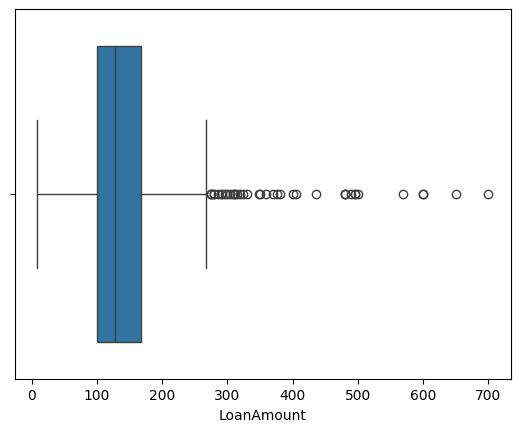

In [170]:
sns.boxplot(data=train, x='LoanAmount')
plt.show()

so there are outliers in the LoanAmount data so we will fill it with median

In [173]:
train['LoanAmount'].isna().sum()

22

In [175]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [177]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [180]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

so na columns are Gender Dependents Self_Employed LoanAmount Loan_Amount_Term Credit_History

In [183]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [185]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

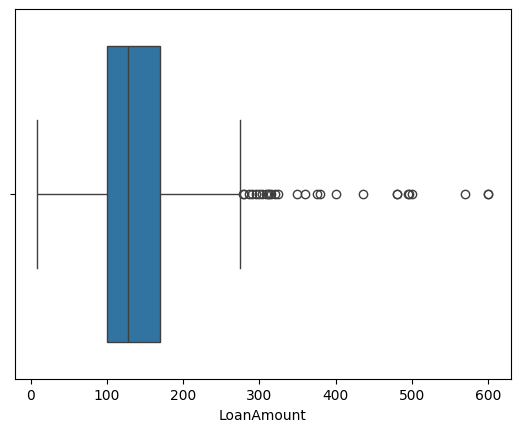

In [187]:
sns.boxplot(df, x='LoanAmount')
plt.show()

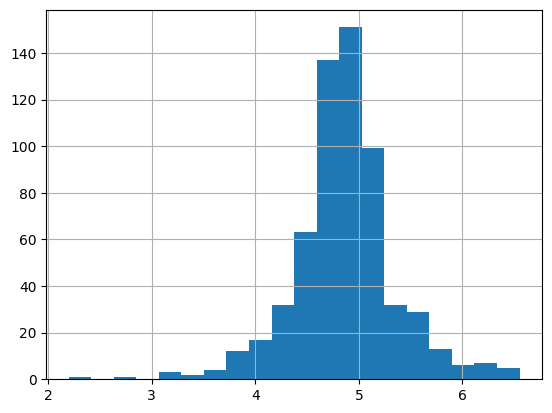

In [189]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
plt.show()
test['LoanAmount_log'] = np.log(test['LoanAmount'])

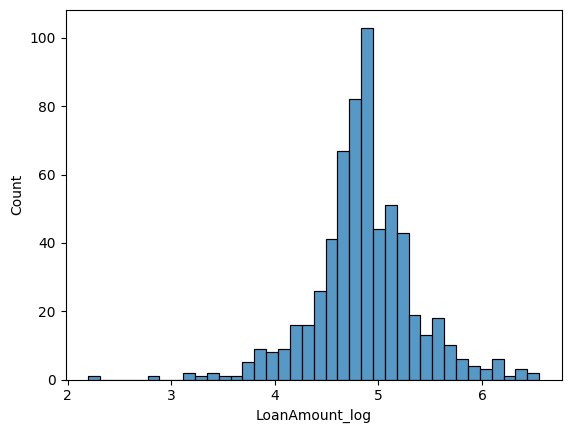

In [190]:
sns.histplot(train,x='LoanAmount_log')
plt.show()

In [192]:
train = train.drop('Loan_ID', axis=1)
test = test.drop('Loan_ID', axis=1)

In [195]:
X = train.drop('Loan_Status', axis=1)
y = train.Loan_Status

In [197]:
X = pd.get_dummies(X)


In [199]:
X.head()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       128.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History  LoanAmount_log  Gender_Female  Gender_Male  Married_No  \
0             1.0        4.852030          False         True        True   
1             1.0        4.852030          False         True       False   
2             1.0        4.189655          False         True       False   
3             1.0        4.787492          False         True       False   
4             1.0        4.948760          False         True        True   

   Married_Yes  ...  Dependents_0  Dependents_1  Dependents_2  \
0        False  ...          True         False         False   
1         True  ...         False          True         False   
2         True  ...          True         False         False   
3         True  ...          True         False         False   
4        False  ...          True         False         False   

   Education_Graduate  Education_Not Graduate  Self_Employed_No  \
0                True                   False              True   
1                True                   False              True   
2                True                   False             False   
3               False                    True              True   
4                True                   False              True   

   Self_Employed_Yes  Property_Area_Rural  Property_Area_Semiurban  \
0              False                False                    False   
1              False                 True                    False   
2               True                False                    False   
3              False                False                    False   
4              False                False                    False   

   Property_Area_Urban  
0                 True  
1                False  
2                 True  
3                 True  
4                 True  

[5 rows x 21 columns]

In [201]:
train = pd.get_dummies(train)

In [203]:
test = pd.get_dummies(test)

In [205]:
train.head()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       128.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History  Loan_Status  LoanAmount_log  Gender_Female  Gender_Male  \
0             1.0            1        4.852030          False         True   
1             1.0            0        4.852030          False         True   
2             1.0            1        4.189655          False         True   
3             1.0            1        4.787492          False         True   
4             1.0            1        4.948760          False         True   

   Married_No  ...  Dependents_0  Dependents_1  Dependents_2  \
0        True  ...          True         False         False   
1       False  ...         False          True         False   
2       False  ...          True         False         False   
3       False  ...          True         False         False   
4        True  ...          True         False         False   

   Education_Graduate  Education_Not Graduate  Self_Employed_No  \
0                True                   False              True   
1                True                   False              True   
2                True                   False             False   
3               False                    True              True   
4                True                   False              True   

   Self_Employed_Yes  Property_Area_Rural  Property_Area_Semiurban  \
0              False                False                    False   
1              False                 True                    False   
2               True                False                    False   
3              False                False                    False   
4              False                False                    False   

   Property_Area_Urban  
0                 True  
1                False  
2                 True  
3                 True  
4                 True  

[5 rows x 22 columns]

In [207]:
test.head()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5720                  0       110.0             360.0   
1             3076               1500       126.0             360.0   
2             5000               1800       208.0             360.0   
3             2340               2546       100.0             360.0   
4             3276                  0        78.0             360.0   

   Credit_History  LoanAmount_log  Gender_Female  Gender_Male  Married_No  \
0             1.0        4.700480          False         True       False   
1             1.0        4.836282          False         True       False   
2             1.0        5.337538          False         True       False   
3             1.0        4.605170          False         True       False   
4             1.0        4.356709          False         True        True   

   Married_Yes  ...  Dependents_0  Dependents_1  Dependents_2  \
0         True  ...          True         False         False   
1         True  ...         False          True         False   
2         True  ...         False         False          True   
3         True  ...         False         False          True   
4        False  ...          True         False         False   

   Education_Graduate  Education_Not Graduate  Self_Employed_No  \
0                True                   False              True   
1                True                   False              True   
2                True                   False              True   
3                True                   False              True   
4               False                    True              True   

   Self_Employed_Yes  Property_Area_Rural  Property_Area_Semiurban  \
0              False                False                    False   
1              False                False                    False   
2              False                False                    False   
3              False                False                    False   
4              False                False                    False   

   Property_Area_Urban  
0                 True  
1                 True  
2                 True  
3                 True  
4                 True  

[5 rows x 21 columns]

In [209]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [211]:
from sklearn.model_selection import train_test_split

x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size=0.3)

In [212]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [214]:
pred_cv = model.predict(x_cv)
accuracy_score(y_cv, pred_cv)

0.7783783783783784

In [217]:
pred_test = model.predict(test)

In [219]:
from sklearn.model_selection import StratifiedKFold

In [221]:
i=1

kf= StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index, test_index in kf.split(X,y):
    print(f"\n{i} of kfold {kf.n_splits}")
    xtr,xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]
    model = LogisticRegression(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1

pred_test = model.predict(test)
pred = model.predict_proba(xvl) [:,1]


1 of kfold 5
accuracy_score 0.8048780487804879

2 of kfold 5
accuracy_score 0.8373983739837398

3 of kfold 5
accuracy_score 0.7804878048780488

4 of kfold 5
accuracy_score 0.7886178861788617

5 of kfold 5
accuracy_score 0.7950819672131147


## [article](https://medium.com/@abhaysingh71711/roc-curve-unveiled-decoding-model-performance-metrics-59eb8a5e2556)
## read the above article for better understanding for auc and roc

[0.         0.         0.         0.02631579 0.02631579 0.05263158
 0.05263158 0.07894737 0.07894737 0.10526316 0.10526316 0.13157895
 0.13157895 0.15789474 0.15789474 0.18421053 0.18421053 0.23684211
 0.23684211 0.26315789 0.26315789 0.31578947 0.31578947 0.36842105
 0.36842105 0.39473684 0.39473684 0.42105263 0.42105263 0.44736842
 0.44736842 0.47368421 0.47368421 0.5        0.5        0.52631579
 0.52631579 0.55263158 0.55263158 0.57894737 0.57894737 0.63157895
 0.63157895 0.68421053 0.68421053 1.        ] [0.         0.01190476 0.03571429 0.03571429 0.29761905 0.29761905
 0.32142857 0.32142857 0.33333333 0.33333333 0.36904762 0.36904762
 0.39285714 0.39285714 0.4047619  0.4047619  0.41666667 0.41666667
 0.44047619 0.44047619 0.51190476 0.51190476 0.53571429 0.53571429
 0.5952381  0.5952381  0.75       0.75       0.77380952 0.77380952
 0.83333333 0.83333333 0.8452381  0.8452381  0.86904762 0.86904762
 0.89285714 0.89285714 0.92857143 0.92857143 0.96428571 0.96428571
 0.98809524 0.98

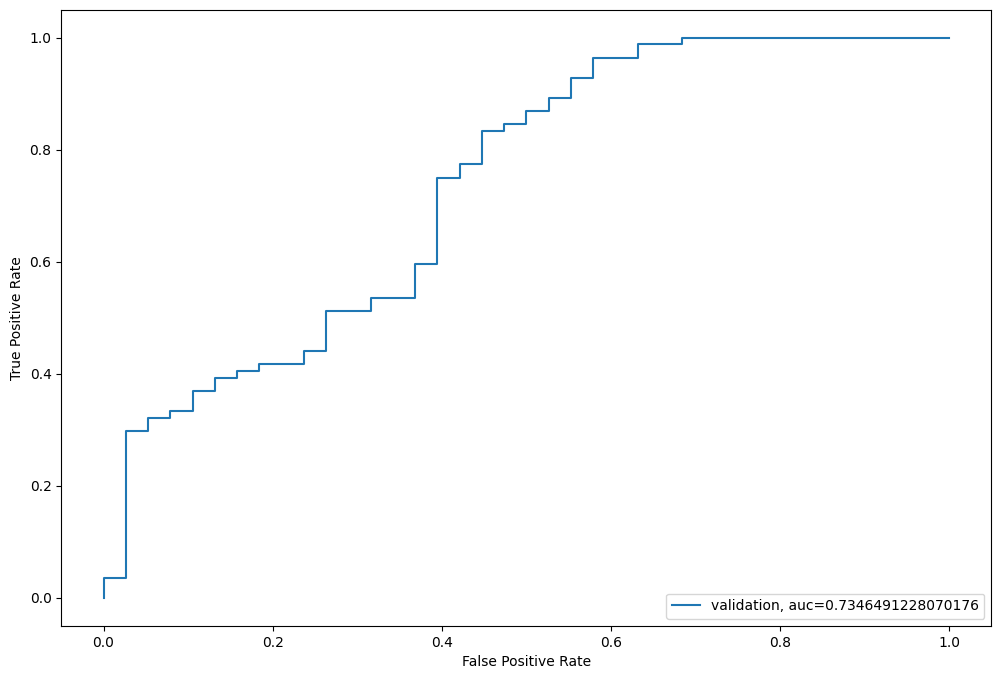

In [224]:
from sklearn import metrics

fpr, tpr, _ =metrics.roc_curve(yvl, pred) 
print(fpr, tpr , _)
auc = metrics.roc_auc_score(yvl, pred)

plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label='validation, auc='+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()




## fpr -> false positive rate
## tpr -> true positive rate
## _ -> threshold
# we get three values in return from roc_curve which are fpr, tpr, threshold

## __Total Income__ :
As discussed during bivariate analysis we will combine the Applicant Income and Coapplicant Income. If the total income is high, chances of loan approval might also be high.

## EMI :
EMI is the monthly amount to be paid by the applicant to repay the loan. Idea behind making this variable is that people who have high EMI’s might find it difficult to pay back the loan. We can calculate the EMI by taking the ratio of loan amount with respect to loan amount term.

## Balance Income :
This is the income left after the EMI has been paid. Idea behind creating this variable is that if this value is high, the chances are high that a person will repay the loan and hence increasing the chances of loan approval

In [231]:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
test['Total_Income'] = test['ApplicantIncome'] + test['CoapplicantIncome']

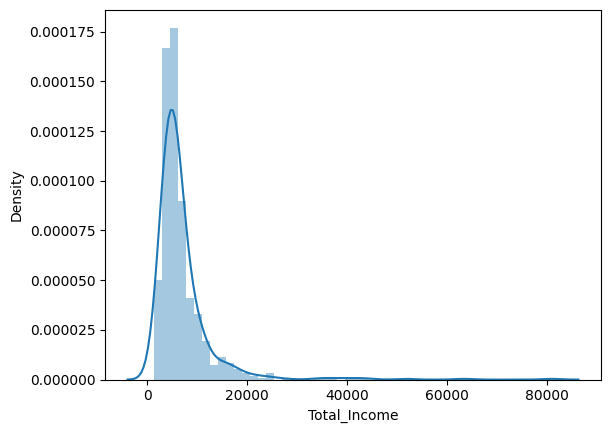

In [233]:
sns.distplot(train['Total_Income'])
plt.show()

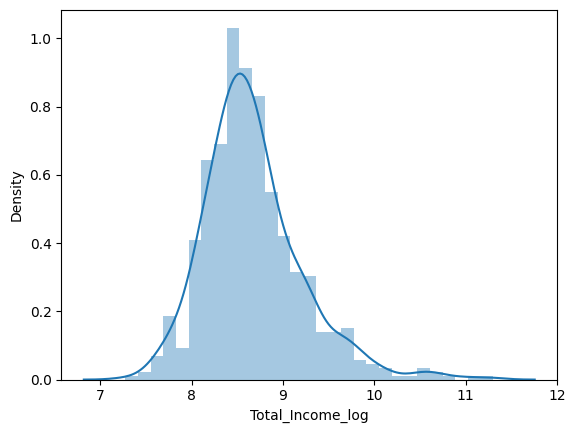

In [234]:
train['Total_Income_log'] = np.log(train['Total_Income'])
sns.distplot(train['Total_Income_log']);
plt.show()

test['Total_Income_log'] = np.log(test['Total_Income'])

In [236]:
train['EMI'] = train['LoanAmount'] / train['Loan_Amount_Term']
test['EMI'] = test['LoanAmount'] / test['Loan_Amount_Term']

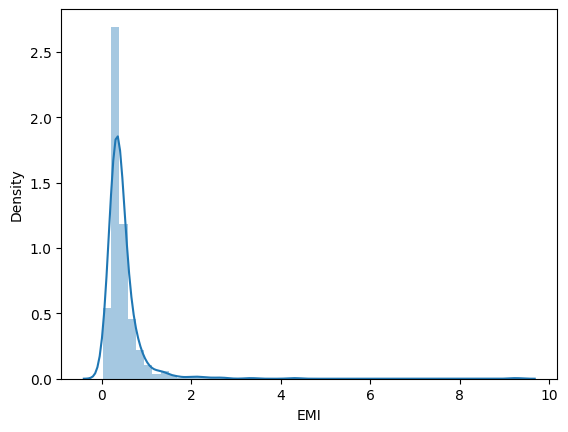

In [239]:
sns.distplot(train['EMI']);
plt.show()

In [240]:
train[['EMI','Total_Income','LoanAmount','Loan_Amount_Term']]

EMI  Total_Income  LoanAmount  Loan_Amount_Term
0    0.355556        5849.0       128.0             360.0
1    0.355556        6091.0       128.0             360.0
2    0.183333        3000.0        66.0             360.0
3    0.333333        4941.0       120.0             360.0
4    0.391667        6000.0       141.0             360.0
..        ...           ...         ...               ...
609  0.197222        2900.0        71.0             360.0
610  0.222222        4106.0        40.0             180.0
611  0.702778        8312.0       253.0             360.0
612  0.519444        7583.0       187.0             360.0
613  0.369444        4583.0       133.0             360.0

[614 rows x 4 columns]

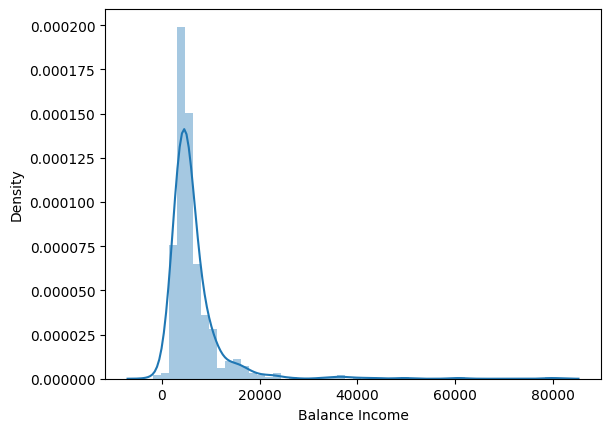

In [243]:
train['Balance Income'] = train['Total_Income']-(train['EMI']*1000)

test['Balance Income'] = test['Total_Income']-(test['EMI']*1000)

sns.distplot(train['Balance Income'])
plt.show()

Let us now drop the variables which we used to create these new features. Reason for doing this is, the correlation between those old features and these new features will be very high and logistic regression assumes that the variables are not highly correlated. We also wants to remove the noise from the dataset, so removing correlated features will help in reducing the noise too.

In [246]:
train = train.drop(['ApplicantIncome', 'CoapplicantIncome','LoanAmount','Loan_Amount_Term'], axis=1)

test = test.drop(['ApplicantIncome', 'CoapplicantIncome','LoanAmount','Loan_Amount_Term'], axis=1)

# Models -> Random Forest, Logistic Regression, Decision Tree, XGBoost

In [250]:
X = train.drop('Loan_Status', axis=1)
y = train.Loan_Status

In [252]:
X.head()

Credit_History  LoanAmount_log  Gender_Female  Gender_Male  Married_No  \
0             1.0        4.852030          False         True        True   
1             1.0        4.852030          False         True       False   
2             1.0        4.189655          False         True       False   
3             1.0        4.787492          False         True       False   
4             1.0        4.948760          False         True        True   

   Married_Yes  Dependents_3  Dependents_0  Dependents_1  Dependents_2  ...  \
0        False         False          True         False         False  ...   
1         True         False         False          True         False  ...   
2         True         False          True         False         False  ...   
3         True         False          True         False         False  ...   
4        False         False          True         False         False  ...   

   Education_Not Graduate  Self_Employed_No  Self_Employed_Yes  \
0                   False              True              False   
1                   False              True              False   
2                   False             False               True   
3                    True              True              False   
4                   False              True              False   

   Property_Area_Rural  Property_Area_Semiurban  Property_Area_Urban  \
0                False                    False                 True   
1                 True                    False                False   
2                False                    False                 True   
3                False                    False                 True   
4                False                    False                 True   

   Total_Income  Total_Income_log       EMI  Balance Income  
0        5849.0          8.674026  0.355556     5493.444444  
1        6091.0          8.714568  0.355556     5735.444444  
2        3000.0          8.006368  0.183333     2816.666667  
3        4941.0          8.505323  0.333333     4607.666667  
4        6000.0          8.699515  0.391667     5608.333333  

[5 rows x 21 columns]

In [254]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [256]:
kf.split(X,y)

<generator object _BaseKFold.split at 0x0000021AC7002BD0>

# Logistic Regression

In [259]:
i=1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]

    model = LogisticRegression(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    print('accuracy_score', score)
    i+=1


pred_test = model.predict(test)
pred = model.predict_proba(xvl)[:,1]
    


1 of kfold 5
accuracy_score 0.7886178861788617

2 of kfold 5
accuracy_score 0.8373983739837398

3 of kfold 5
accuracy_score 0.7967479674796748

4 of kfold 5
accuracy_score 0.7804878048780488

5 of kfold 5
accuracy_score 0.7868852459016393


In [261]:
pred

array([0.72526724, 0.86830921, 0.80615692, 0.86544898, 0.87040945,
       0.88990848, 0.76754557, 0.72170355, 0.84568393, 0.92337   ,
       0.78268259, 0.77950161, 0.89980112, 0.27067602, 0.73618881,
       0.88978275, 0.89059769, 0.87027288, 0.72615961, 0.91994808,
       0.59705653, 0.15470561, 0.7936065 , 0.7294279 , 0.63136212,
       0.64589835, 0.58711017, 0.76318162, 0.85556263, 0.88692378,
       0.15648179, 0.08184638, 0.74840244, 0.67301928, 0.78739075,
       0.7517092 , 0.70609651, 0.87627283, 0.7591747 , 0.08113363,
       0.72116836, 0.90644971, 0.9140726 , 0.12444389, 0.67249683,
       0.83530346, 0.85905332, 0.76994297, 0.21708761, 0.77601222,
       0.89487077, 0.36666399, 0.83850542, 0.89167601, 0.89962669,
       0.67622689, 0.74329991, 0.75048129, 0.06019295, 0.85598212,
       0.88552968, 0.85040768, 0.7914409 , 0.87658509, 0.65142203,
       0.8579186 , 0.69888648, 0.75695133, 0.62547206, 0.63021862,
       0.84451406, 0.80283111, 0.74139215, 0.69550987, 0.85630

In [263]:
pred_test

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

## Decision Tree

In [268]:
from sklearn import tree

i=1
kf = StratifiedKFold(n_splits=5,random_state=1, shuffle=True)
for train_index, test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]
    model = tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    print('accuracy_score',score)
    i+=1

pred_test = model.predict(test)


1 of kfold 5
accuracy_score 0.7398373983739838

2 of kfold 5
accuracy_score 0.6991869918699187

3 of kfold 5
accuracy_score 0.7560975609756098

4 of kfold 5
accuracy_score 0.7073170731707317

5 of kfold 5
accuracy_score 0.6721311475409836


## Random Forest


In [273]:
from sklearn.ensemble import RandomForestClassifier

i=1
kf= StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]
    model = RandomForestClassifier(random_state=1, max_depth=10)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    print('accuracy_score',score)
    i+=1

pred_test = model.predict(test)


1 of kfold 5
accuracy_score 0.8292682926829268

2 of kfold 5
accuracy_score 0.8130081300813008

3 of kfold 5
accuracy_score 0.7723577235772358

4 of kfold 5
accuracy_score 0.8048780487804879

5 of kfold 5
accuracy_score 0.7540983606557377


In [274]:
# gridsearch on the random forest model

In [276]:
from sklearn.model_selection import GridSearchCV

paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators':list(range(1, 200, 2))}


grid_search = GridSearchCV(RandomForestClassifier(random_state=1), paramgrid)

from sklearn.model_selection import train_test_split

x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size=0.3, random_state=1)

grid_search.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                          23, 25, 27, 29, 31, 33, 35, 37, 39,
                                          41, 43, 45, 47, 49, 51, 53, 55, 57,
                                          59, ...]})

# optimized value for max_depth=9 n_estimator=41

In [291]:
i=1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

for train_index,test_index in kf.split(X, y):
    print('\n{} of kfold'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index],y[test_index]
    model = RandomForestClassifier(random_state=1, max_depth=9, n_estimators=55)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    print('accuracy_score',score)
    i+=1

pred_test = model.predict(test)
pred2 = model.predict_proba(test) [:,1]


1 of kfold
accuracy_score 0.8292682926829268

2 of kfold
accuracy_score 0.7967479674796748

3 of kfold
accuracy_score 0.7886178861788617

4 of kfold
accuracy_score 0.7967479674796748

5 of kfold
accuracy_score 0.7622950819672131


# XGBOOST


In [298]:
from xgboost import XGBClassifier

kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]
    model = XGBClassifier(n_estimator=50, max_depth=4)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    print('accuracy_score',score)
    i+=1


pred_test = model.predict(test)
pred3 = model.predict_proba(test)[:,1]


11 of kfold 5
accuracy_score 0.7642276422764228

12 of kfold 5
accuracy_score 0.7479674796747967

13 of kfold 5
accuracy_score 0.7642276422764228

14 of kfold 5
accuracy_score 0.7642276422764228

15 of kfold 5
accuracy_score 0.7622950819672131
